In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('DATS')

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.shape

(209593, 37)

In [6]:
df.info

<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

<AxesSubplot:>

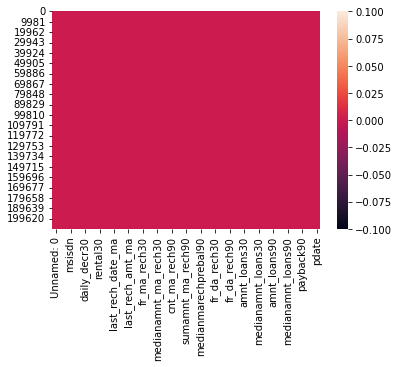

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

Observation:
This dataset contain 209593 rows and 37 columns.
We have 3 features with object datatype and rest features are int64.
Our target feature is label with int datatype.

In [9]:
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)

In [10]:
df.drop(['pdate'],axis=1,inplace=True)
df.drop(['Year'],axis=1,inplace=True)

In [11]:
df.shape

(209593, 38)

In [12]:
df.duplicated('msisdn').sum()  # This will check the duplicate data for all columns.

23350

Lte'e check Data Integrity Check

# EDA

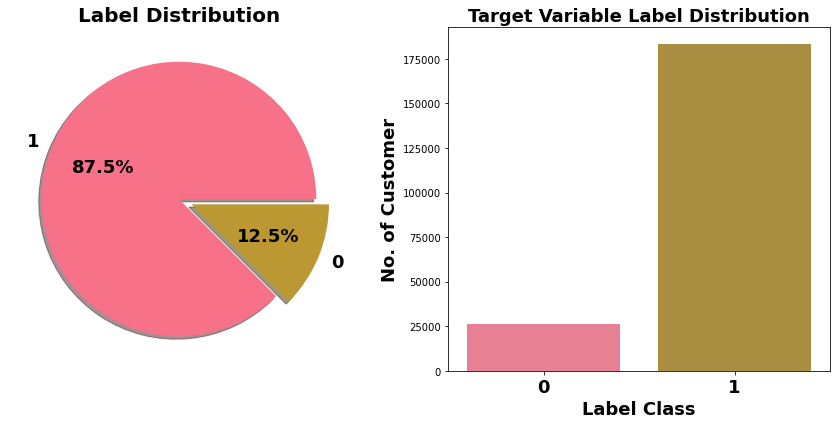

In [13]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Label Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Target Variable Label Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Here we have seen Label class 1 represent Non-defaulter while Label class 0 represent Defaulter i.e. Loan not paid
We can see Most of customers are Non-defaulter while very few are defaulter.
From the ML model building point of view target variable is imbalanced data case.

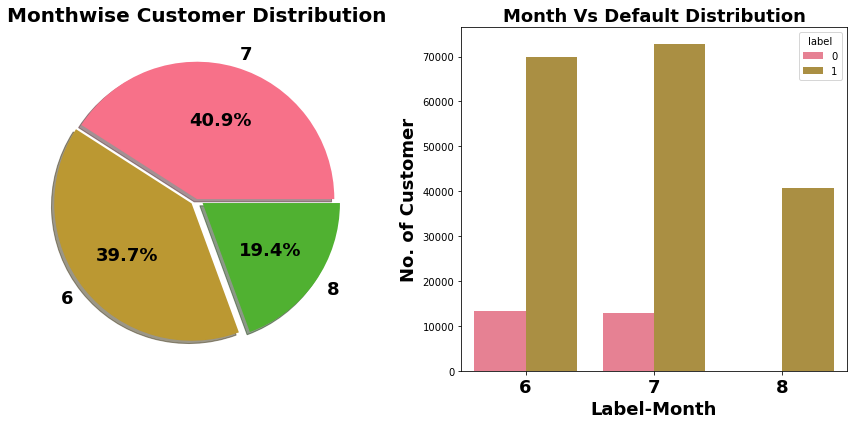

In [14]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['Month'].value_counts().plot.pie(explode=[0,0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Monthwise Customer Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('Month',hue='label',data=df,ax=ax[1])
ax[1].set_title('Month Vs Default Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label-Month",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

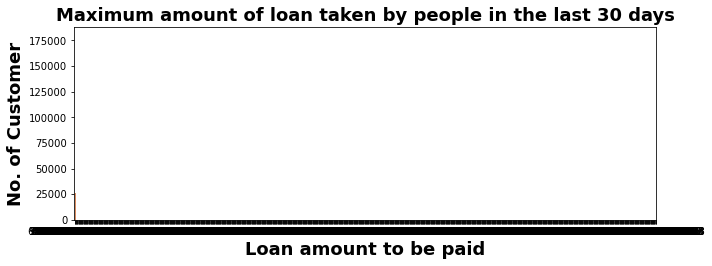

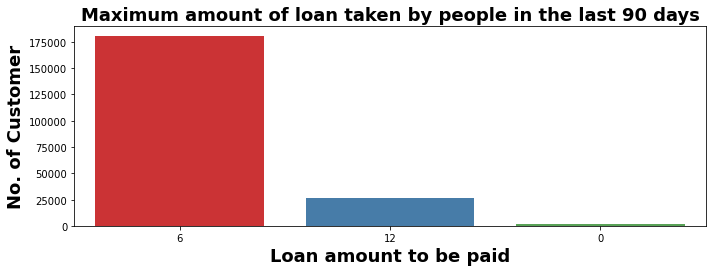

6.000000        179193
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
                 ...  
30346.385852         1
66821.819056         1
55716.817238         1
41580.156627         1
96927.243252         1
Name: maxamnt_loans30, Length: 1050, dtype: int64


6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [15]:
plt.figure(figsize = (10,10))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans30'].value_counts())
print('\n')
print(df['maxamnt_loans90'].value_counts())

Observations:
In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the number of the people had not taken loan and their number is 4291.

In 90 days, there are maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26605 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.

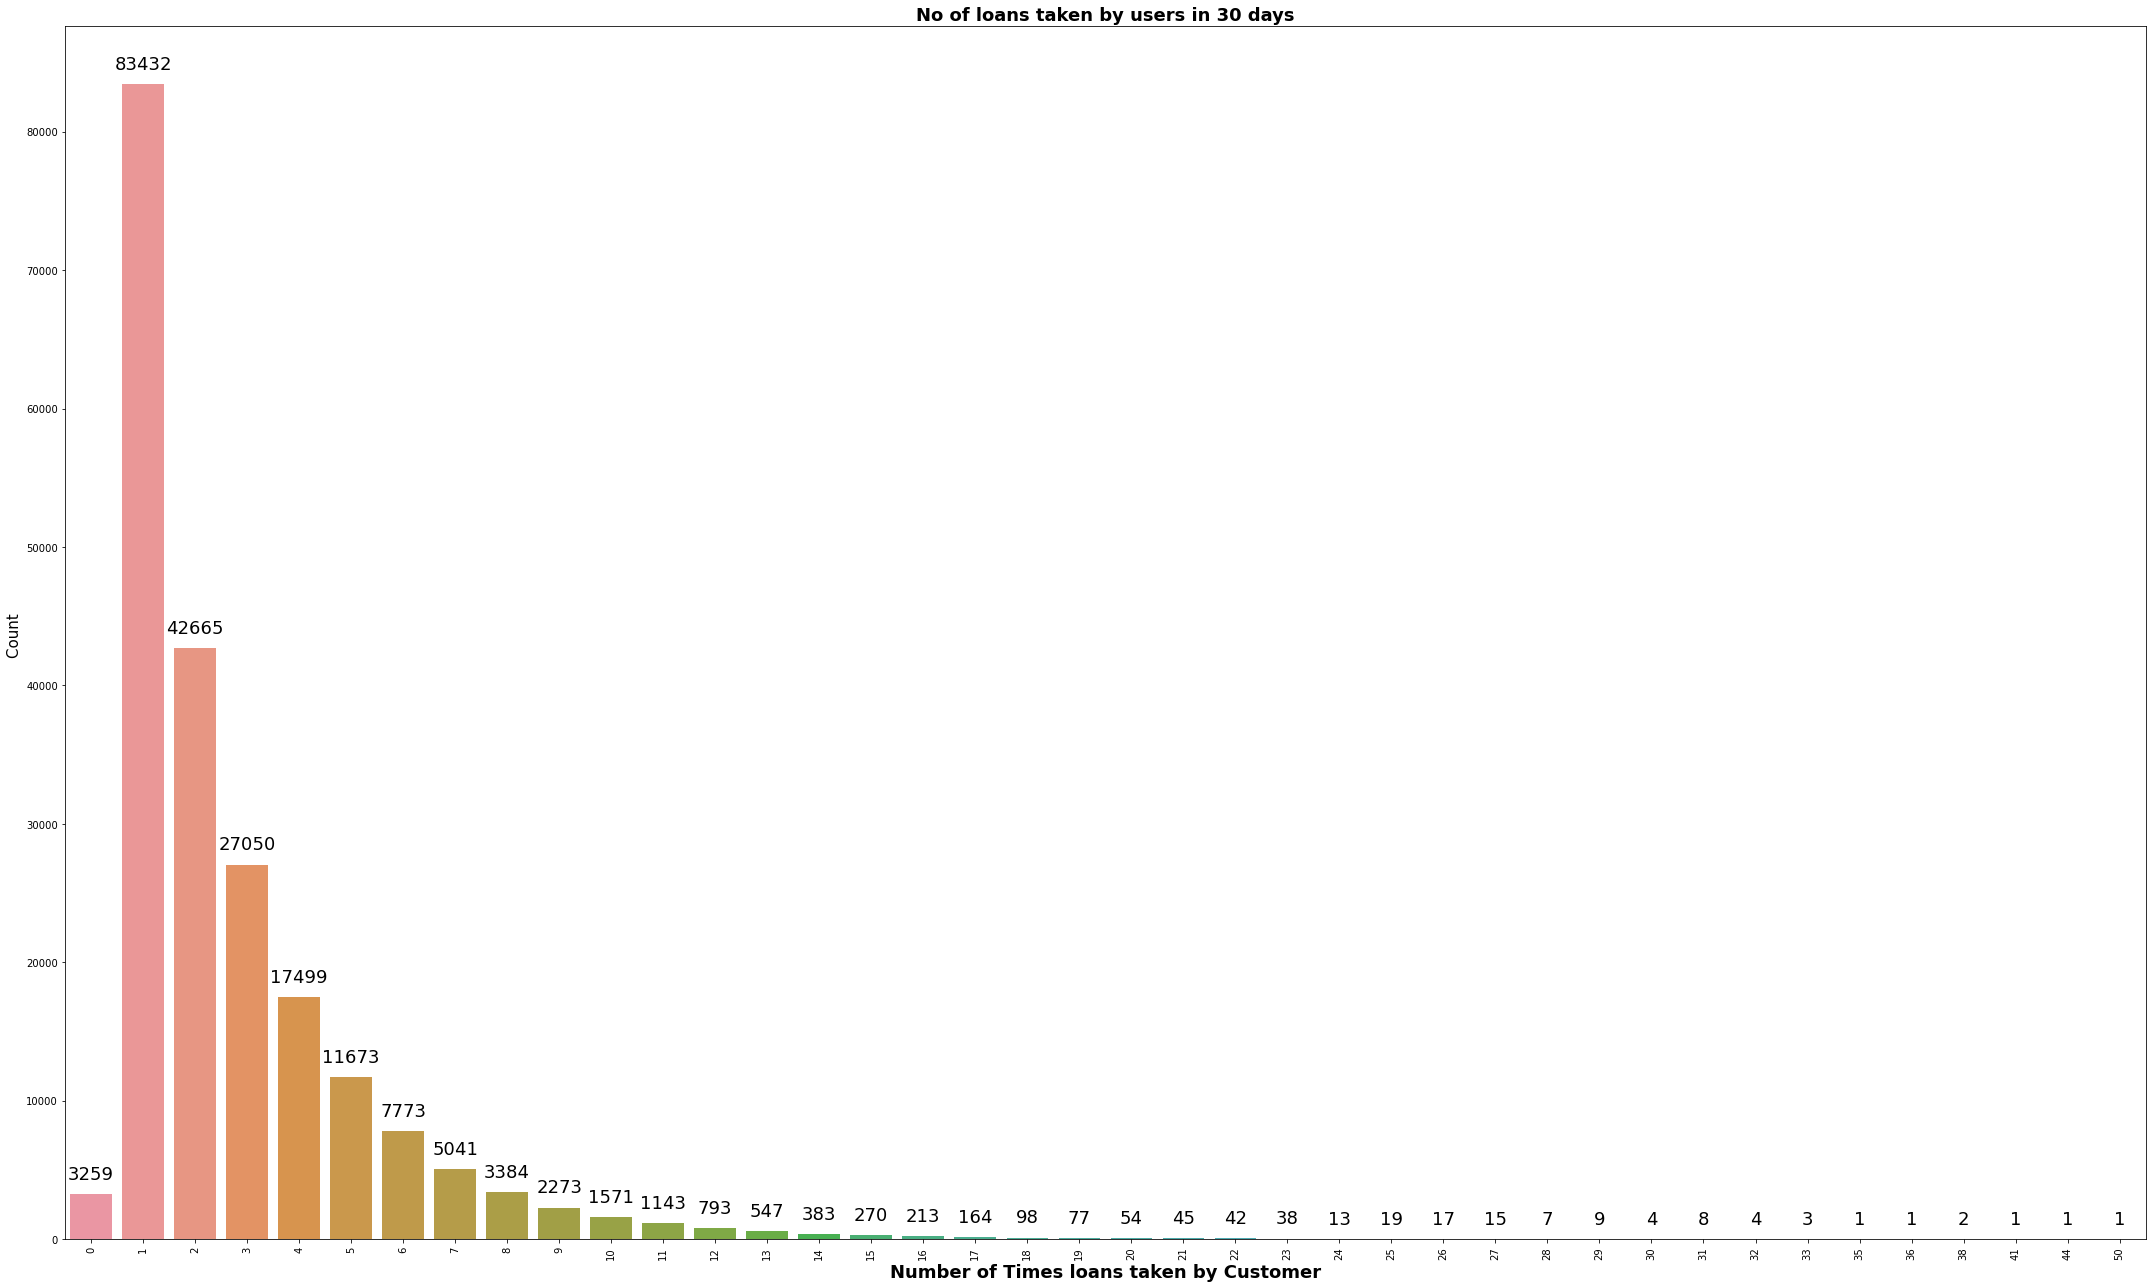

In [16]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

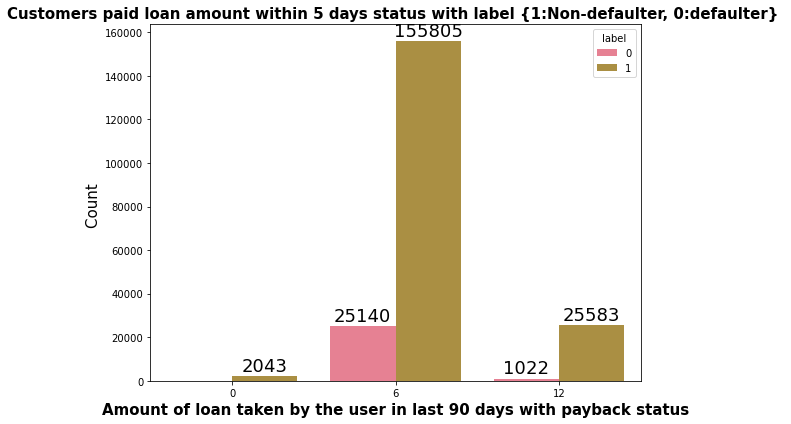

In [17]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

# Correlation

In [18]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411,-0.002045,0.003205
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919


<AxesSubplot:>

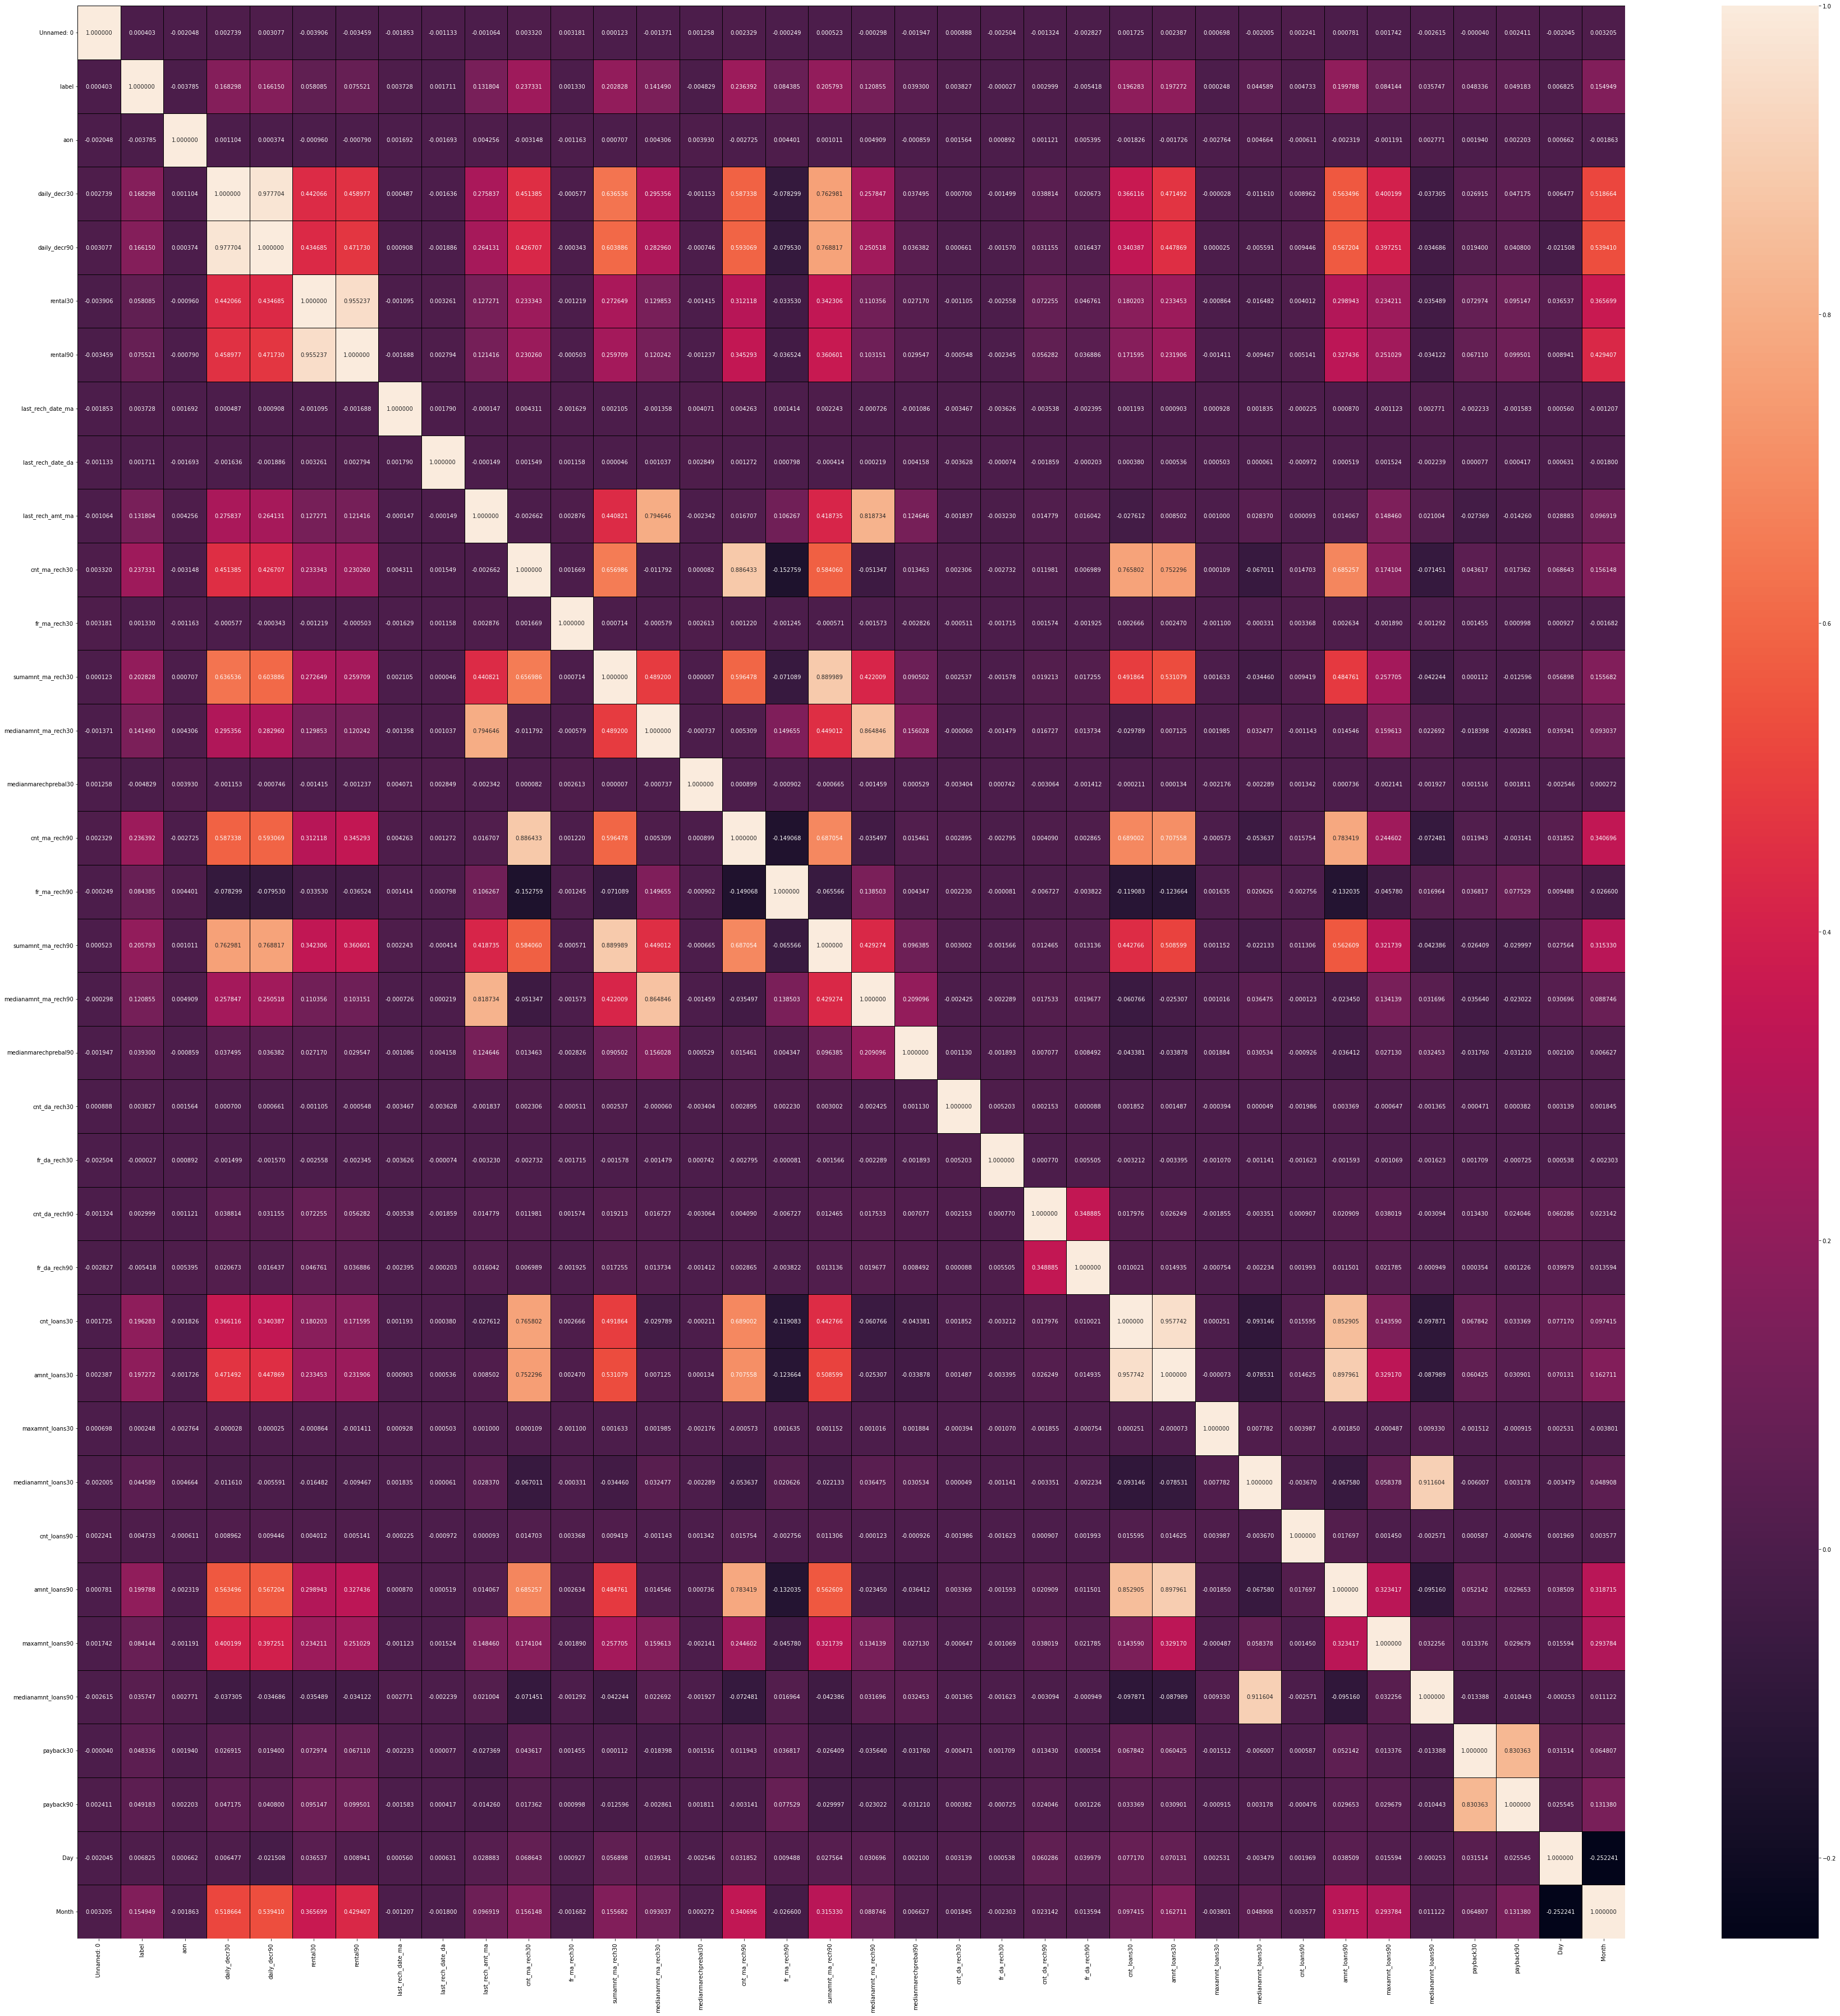

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

# describe:

In [20]:
df['maxamnt_loans30'].describe()

count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

In [21]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


We  knew that the maximum loan amount taken by customers can be 0,5,10 and that can be repay with the amount of 0,6,12. We gone replace values greater than 12 into category of zero.

# We are making assumption here that loan amount greater than 12 to be replace with zero.

In [22]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0


In [23]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

# Outliers Detection and Removal

In [24]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

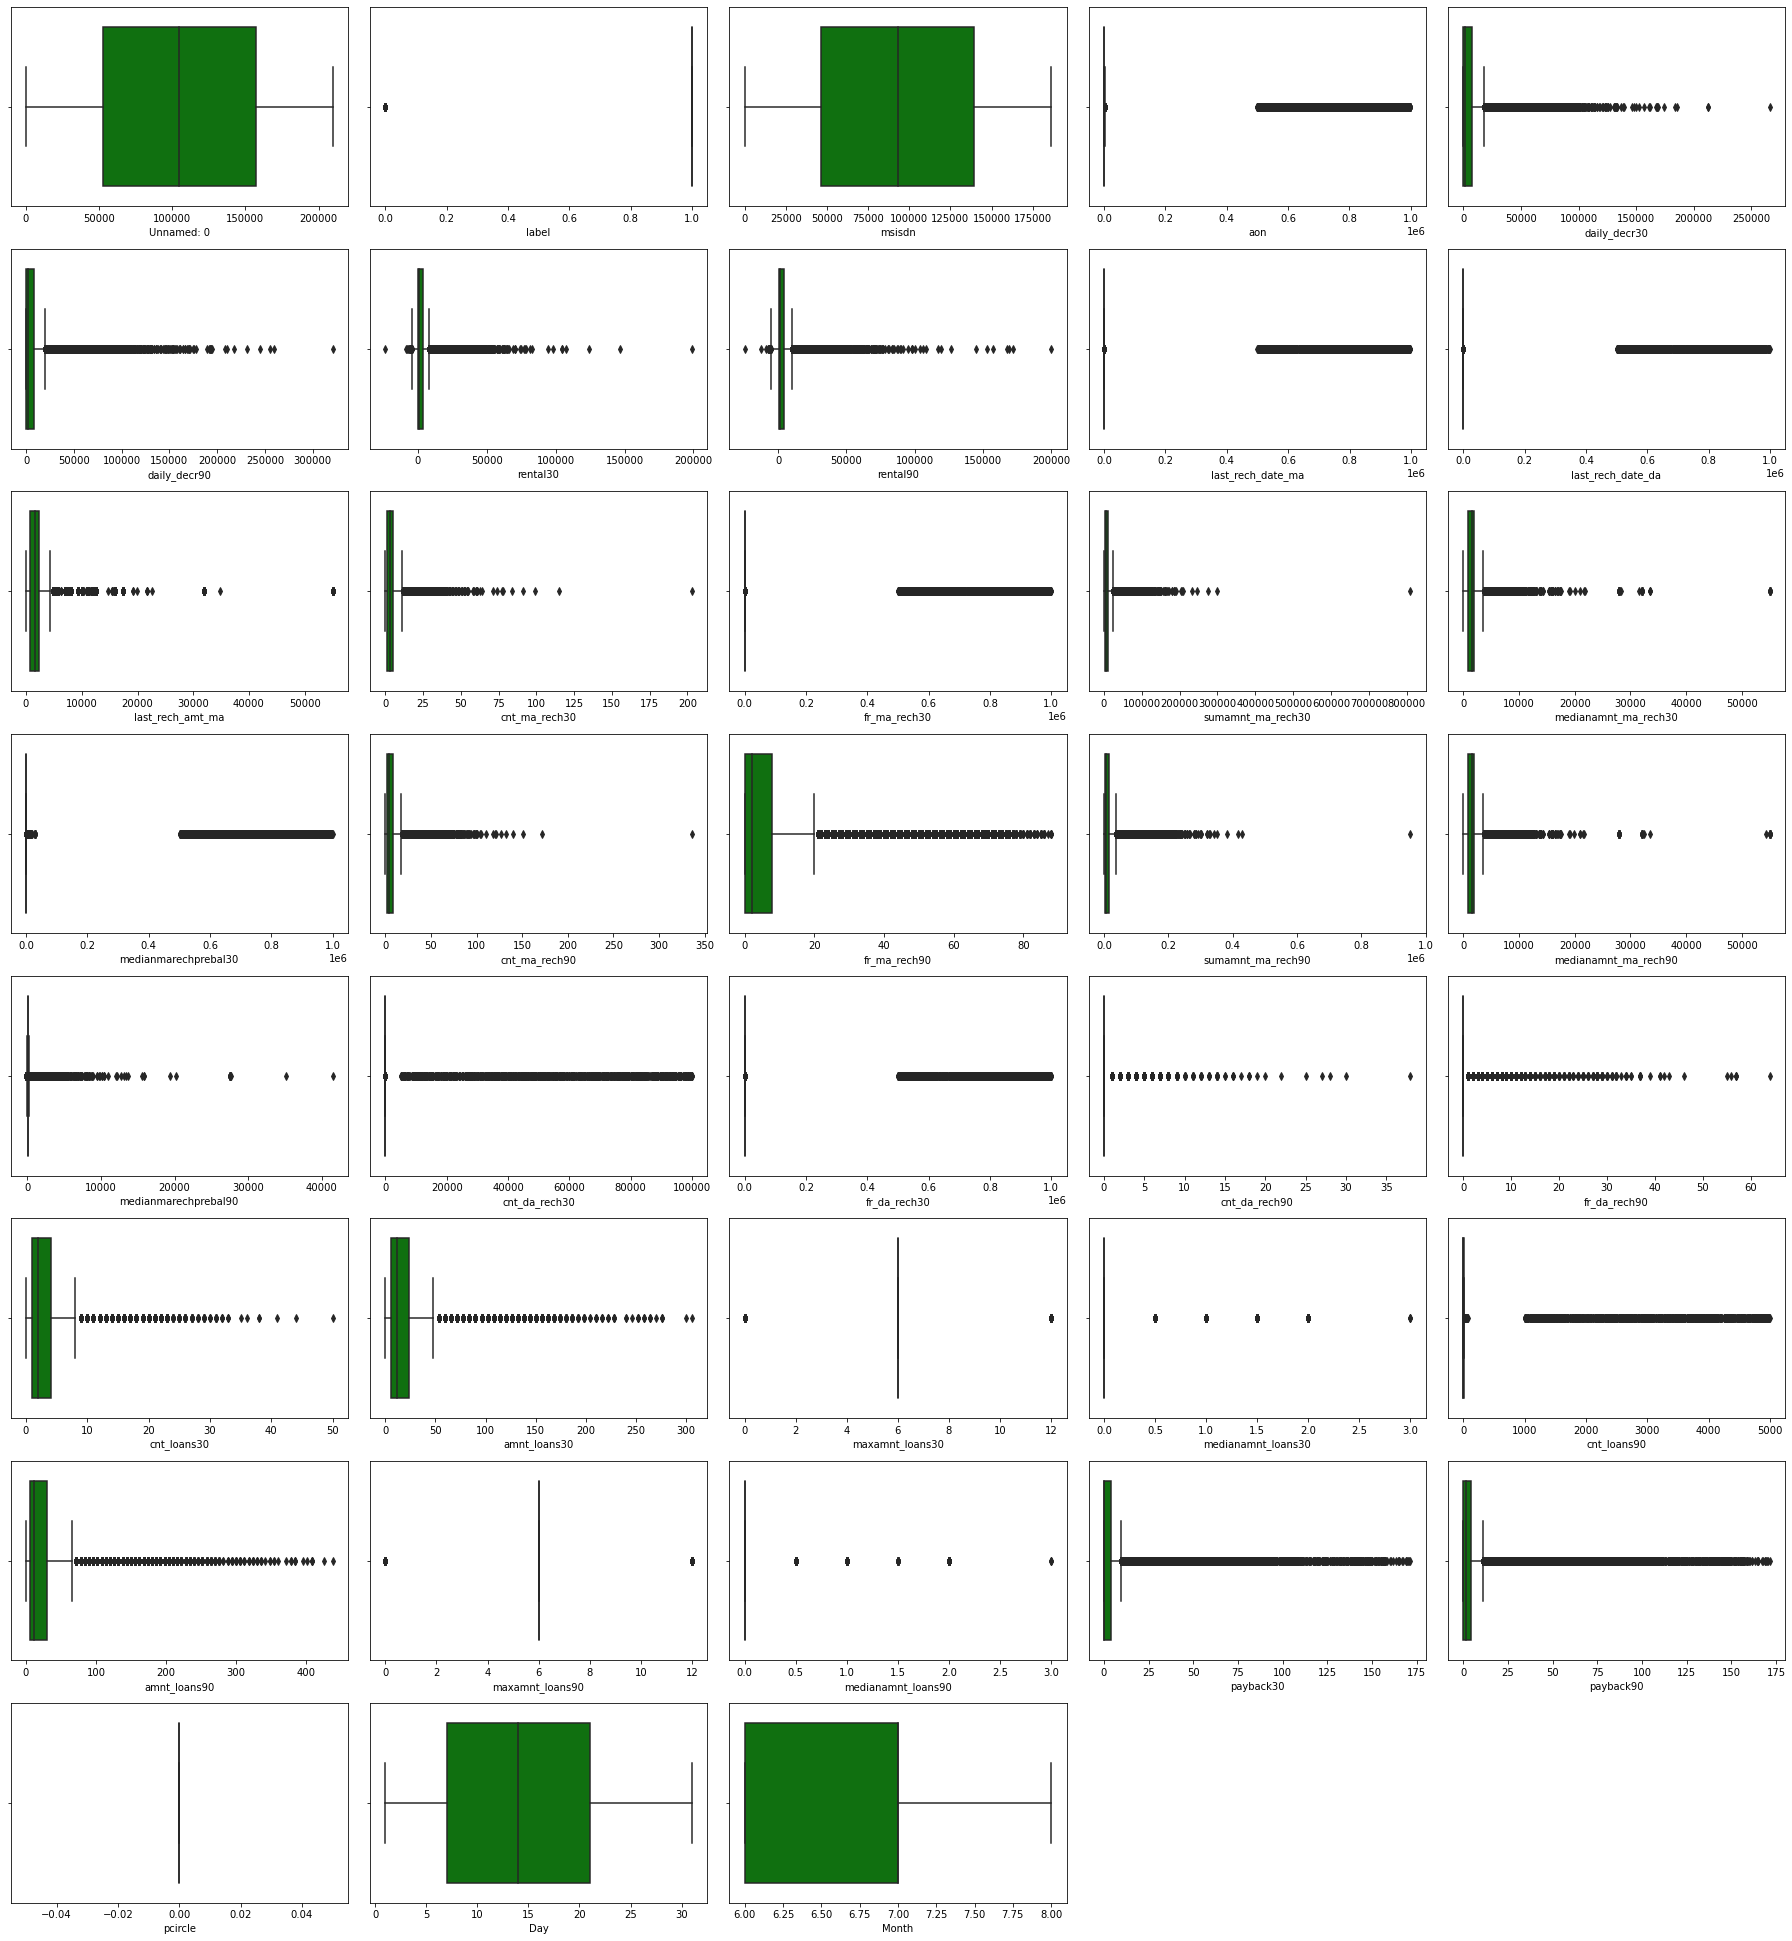

In [25]:
colist=df.columns.values
graph=1
plt.figure(figsize=(25,30))
for i in range(0, len(colist)):
    plt.subplot(9,5,graph)
    sns.boxplot(df[colist[i]],color='green',orient='h')
    graph+=1
    plt.tight_layout()

# Outliers removal using Zscore method

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(209593, 38)

In [27]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([17, 17, 34, ..., 30, 28, 32], dtype=int64))


In [28]:
import pandas as pd

In [29]:
df1=df.copy()
z = np.abs(zscore(df))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (209593, 38)
Shape of the dataframe after removing outliers:  (0, 38)
Percentage of data loss post outlier removal:  100.0


In [30]:
df.shape

(209593, 38)

In [31]:
# Splitting data in target and dependent feature
X = df.drop(['label'], axis =1)
Y = df['label']

In [32]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30          1.241879
medianamnt_loans30       4.551043
cnt_loans90   

In [33]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [34]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [35]:
df[skew_fea] = scaler.fit_transform(df[skew_fea].values)

In [36]:
# Droping unncessary column
df.drop(['fr_da_rech30'],axis=1,inplace=True)
df.drop(['fr_da_rech90'],axis=1,inplace=True)

# Feature engineering
Feature engineering is the where we can process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that is represent some object. Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate are processing and statistical analysis.

In [37]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['msisdn', 'pcircle'], int64: ['Unnamed: 0', 'label', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']}

In [38]:
#Droping PCircle and msisdn column as they are unnecessary for further investigation
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    print(vif)

In [41]:
calc_vif()

               variables  VIF FACTOR
0             Unnamed: 0    3.936277
1                 msisdn    3.931899
2                    aon    1.011551
3           daily_decr30   39.223150
4           daily_decr90   42.406750
5               rental30   18.338520
6               rental90   18.951601
7      last_rech_date_ma    1.004966
8      last_rech_date_da    1.004945
9       last_rech_amt_ma    6.033536
10         cnt_ma_rech30   28.148315
11          fr_ma_rech30    1.004962
12     sumamnt_ma_rech30   20.062120
13  medianamnt_ma_rech30    8.970181
14  medianmarechprebal30    1.005192
15         cnt_ma_rech90   28.968700
16          fr_ma_rech90    1.468838
17     sumamnt_ma_rech90   23.401848
18  medianamnt_ma_rech90   10.152178
19  medianmarechprebal90    1.131559
20         cnt_da_rech30    1.004146
21          fr_da_rech30    1.004968
22         cnt_da_rech90    1.161603
23          fr_da_rech90    1.142981
24           cnt_loans30   49.607909
25          amnt_loans30   60.841678
2

In [42]:
x=df.drop("maxamnt_loans90",axis=1)


In [43]:
df.shape

(209593, 34)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scale=sc.fit_transform(X)


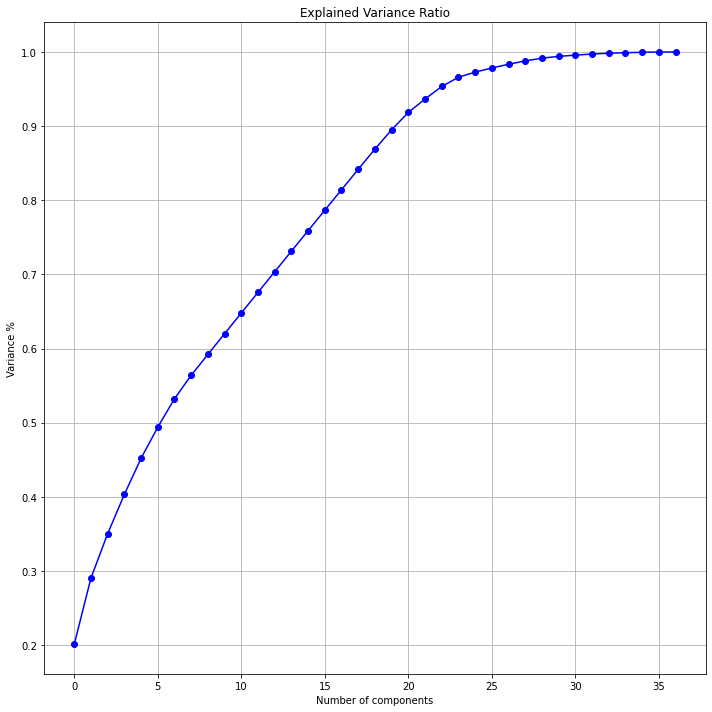

In [45]:
#plot the graph to find the principal components
from sklearn.decomposition import PCA
pca =PCA()
x_pca =pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

AS per the graph, we can see that 12 principal components attribute for 90% of variation in the data. We shall pick the first 12 components for our prediction.

In [46]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [47]:
principle_x=pd.DataFrame(x_new,columns=np.arange(11))

# Since the data has only 2 output we will use classification model¶

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=i,test_size=0.20)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(accuracy_score(Y_train,pred_train)*100,1)==round(accuracy_score(Y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 6 The model is performing very wel
Traning accuracy score is= 6
Testing accuracy score is= 6
randam state= 8 The model is performing very wel
Traning accuracy score is= 8
Testing accuracy score is= 8
randam state= 11 The model is performing very wel
Traning accuracy score is= 11
Testing accuracy score is= 11
randam state= 13 The model is performing very wel
Traning accuracy score is= 13
Testing accuracy score is= 13
randam state= 15 The model is performing very wel
Traning accuracy score is= 15
Testing accuracy score is= 15
randam state= 17 The model is performing very wel
Traning accuracy score is= 17
Testing accuracy score is= 17
randam state= 19 The model is performing very wel
Traning accuracy score is= 19
Testing accuracy score is= 19
randam state= 22 The model is performing very wel
Traning accuracy score is= 22
Testing accuracy score is= 22
randam state= 35 The model is performing very wel
Traning accuracy score is= 35
Testing accuracy score is= 35
randam state= 39

randam state= 369 The model is performing very wel
Traning accuracy score is= 369
Testing accuracy score is= 369
randam state= 374 The model is performing very wel
Traning accuracy score is= 374
Testing accuracy score is= 374
randam state= 375 The model is performing very wel
Traning accuracy score is= 375
Testing accuracy score is= 375
randam state= 376 The model is performing very wel
Traning accuracy score is= 376
Testing accuracy score is= 376
randam state= 383 The model is performing very wel
Traning accuracy score is= 383
Testing accuracy score is= 383
randam state= 384 The model is performing very wel
Traning accuracy score is= 384
Testing accuracy score is= 384
randam state= 397 The model is performing very wel
Traning accuracy score is= 397
Testing accuracy score is= 397
randam state= 406 The model is performing very wel
Traning accuracy score is= 406
Testing accuracy score is= 406
randam state= 408 The model is performing very wel
Traning accuracy score is= 408
Testing accura

randam state= 739 The model is performing very wel
Traning accuracy score is= 739
Testing accuracy score is= 739
randam state= 746 The model is performing very wel
Traning accuracy score is= 746
Testing accuracy score is= 746
randam state= 755 The model is performing very wel
Traning accuracy score is= 755
Testing accuracy score is= 755
randam state= 756 The model is performing very wel
Traning accuracy score is= 756
Testing accuracy score is= 756
randam state= 775 The model is performing very wel
Traning accuracy score is= 775
Testing accuracy score is= 775
randam state= 776 The model is performing very wel
Traning accuracy score is= 776
Testing accuracy score is= 776
randam state= 779 The model is performing very wel
Traning accuracy score is= 779
Testing accuracy score is= 779
randam state= 783 The model is performing very wel
Traning accuracy score is= 783
Testing accuracy score is= 783
randam state= 789 The model is performing very wel
Traning accuracy score is= 789
Testing accura

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(Y_test,pred_test))
print(accuracy_score(Y_test,pred_test))
print(confusion_matrix(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.56      0.02      0.04      5299
           1       0.88      1.00      0.93     36620

    accuracy                           0.87     41919
   macro avg       0.72      0.51      0.48     41919
weighted avg       0.84      0.87      0.82     41919

0.8741382189460627
[[  101  5198]
 [   78 36542]]


# RandomForestClassifier

In [52]:
 from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Accuracy 91.9487583196164
[[ 2652  2647]
 [  728 35892]]
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      5299
           1       0.93      0.98      0.96     36620

    accuracy                           0.92     41919
   macro avg       0.86      0.74      0.78     41919
weighted avg       0.91      0.92      0.91     41919



# ExtraTreesClassifier:

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.8923314923517335


Confusion matrix of Extra Trees Classifier : 
 [[ 2990  5636]
 [ 1811 58729]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.62      0.35      0.45      8626
           1       0.91      0.97      0.94     60540

    accuracy                           0.89     69166
   macro avg       0.77      0.66      0.69     69166
weighted avg       0.88      0.89      0.88     69166



# Cross Validation Extra Tree Classifier

In [54]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.89031227 0.89098022 0.89171975 0.89415048 0.89073906]
Mean CV Score : 0.8915803568288665
Std deviation : 0.0013638891414102898


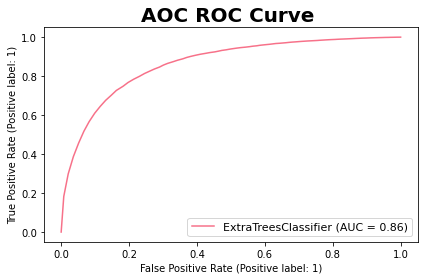

Auc Score :
 0.6583561858567735


In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Let's Test new Parameters:

In [56]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 89.27000000000001 %


# Precision and Recall:

In [57]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

NameError: name 'predictions' is not defined

# Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'] }

In [60]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 1/5; 1/6] END criterion=gini, max_features=auto;, score=0.889 total time=  13.7s
[CV 2/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 2/5; 1/6] END criterion=gini, max_features=auto;, score=0.891 total time=  13.2s
[CV 3/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 3/5; 1/6] END criterion=gini, max_features=auto;, score=0.891 total time=  13.1s
[CV 4/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 4/5; 1/6] END criterion=gini, max_features=auto;, score=0.889 total time=  13.0s
[CV 5/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 5/5; 1/6] END criterion=gini, max_features=auto;, score=0.889 total time=  13.1s
[CV 1/5; 2/6] START criterion=gini, max_features=sqrt...........................
[CV 1/5; 2/6] END criterion=g

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=10)

In [61]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

# Extra Tree Classifier model based on Hyper Parameter Tuning

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier(criterion='gini', max_features = 'auto')
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \na',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.8919555851140734


Confusion matrix of Extra Trees Classifier : 
a [[ 2973  5653]
 [ 1820 58720]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.62      0.34      0.44      8626
           1       0.91      0.97      0.94     60540

    accuracy                           0.89     69166
   macro avg       0.77      0.66      0.69     69166
weighted avg       0.88      0.89      0.88     69166



In [63]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.89050311 0.8913142  0.89255469 0.89348251 0.89124004]
Mean CV Score : 0.891818911341175
Std deviation : 0.0010611399251877287


# Final Model AOC ROC

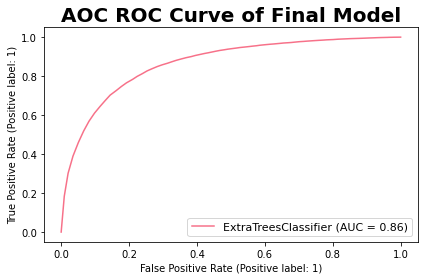

Auc Score :
 0.6572964618380476


In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# SAVING MODEL

In [67]:
import pickle
filename='Micro.pkl'
pickle.dump(rf,open(filename,'wb'))

# Prediction

In [68]:
prediction = etc.predict(X_test)

In [69]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred

,Predicted Values,Actual Values
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
69161,1,1
69162,1,1
69163,0,0
69164,1,1
